# pruning 공부

1. 3단계 pruning 학습 진행
    1. pruning 학습 방법
        - 1단계: 일반적인 학습 과정을 통해 어떤 연결이 중요한지 파악
                -> 추론을 위한 최적화된 모델을 얻기 위한 수준이 아니라 pruning전에 각 connection의 중요도를 파악하는 수준으로 진행
        - 2단계: weight값이 threshold 이하인 connection들을 제거함
        - 3단계: 밀도가 낮아진 신경망을 재학습하여 정확도 손실 보완
        
    
    2. 구체적인 방법
        - 정규화 - L1정규화: 많은 연결들이 제거되어 재학습단계에서 정확도 손실 보완 어려움. 이 정규화는 가중치 절대값의 합에 비례하여 가중치에 penelty를 부과하며 중요도가 낮은 가중치를 0이 되도록 한다
                - L2 정규화: 가중치 제곱의 합에 비례하여 가중치 penelty를 부과하며 이상점 가중치를 0에 가까운 값이 되도록함.
                
         -  dropout ratio adjustment: pruning으로 이미 모델의 capacity가 낮아진 상태이므로, 재학습 시에 dropout이 덜 되도록 더 낮은 dropout ratio를 적용
         
         - local pruning 및 parameter Co-adaptation: 재학습 시에 특정 layer의 가중치들을 초기화하지 말고 현재의 값을 보존한 상태에서 재학습 수행
         
         - iterative pruning: 원하는 pruning수준을 달성할 때까지 pruning과 재학습 반복적으로 수행
         
         - pruning neurons: 반복적인 pruning process를 수행하면서 입력 연결이 0이거나 출력 연결이 0인 노드 제거
    

2. gradual pruning
    1. 개요
       - 신경망 모델 pruning은 0이 아닌 신경망 모델 파라미터의 개수를 줄여 신경망 모델의 밀도를 낮추는 작업
       - gradual pruning을 적용하여 정확도 손실을 최소화하면서 0이 아닌 파라미터의 개수를 수배~10배 줄이기 가능
       
    2. 방법
        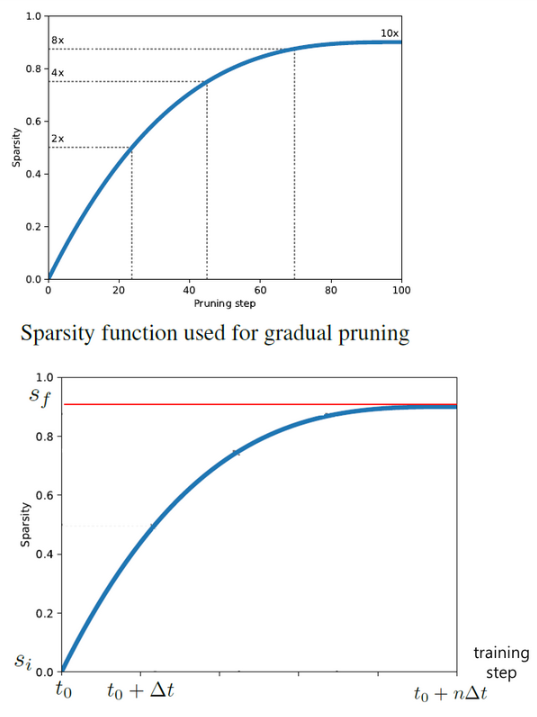
        - sparsity
                신경망의 weight들이 0으로 pruning된 비율을 나타내는 지표로 신경망의 밀도가 낮아진 정도를 나타낸다
                
        - binary mask를 이용한 pruning
                pruning의 대상이 되는 모든 layer에 대해 binary mask 변수 추가. 
                binary mask 변수는 layer의 weight tensor와 형태+크기가 동일하며 그래프의 추론에 참여하는 weight들을 결정. 
                tensorflow 학습 그래프에 operation을 추가하여 각 layer의 weight들을 절대값에 따라 sorting하고 원하는 sparsity level에 도달할때까지 크기가 가장 작은 weight들을 0으로 mask함
                masking된 weight들은 back-propagation시에도 갱신 x
                
         - gradual pruning 알고리즘
                 sparsity초기 값에서 시작하여 목표값에 도달할 때까지 n번 pruning step에 걸쳐 sparsity를 증가시킨다. 
                 pruning step은 training step t0에서 시작하여 일정한 traning step 간격에 따라 증가한다.
                 각 pruning step에서 목표로 하는 sparsity level이 달성될때까지 binary weight mask를 갱신하여 pruning 수행
                 **pruning 수행 후 training step을 통해 정확도 하락 회복**
                 **pruning schedule은 learning rate schedule도 고려해서 결정**